In [201]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import glob
import os
import PIL
import PIL.Image
import imageio
import imgaug as ia

from pathlib import Path
from numpy import asarray
from imgaug import augmenters as iaa
from keras import backend as K
from keras import layers
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
from skimage.io import imread
from skimage import exposure, color
from skimage.transform import resize

In [202]:
train_data_path = '../../sensix_daninhas/dataset_100x100/train'
test_data_path  = '../../sensix_daninhas/dataset_100x100/validation'

img_rows = 100
img_cols = 100
epochs = 300
batch_size = 2

In [203]:
num_of_train_samples = len(glob.glob(train_data_path + "/**/*" + ".jpg" , recursive=True))
num_of_test_samples  = len(glob.glob(test_data_path + "/**/*" + ".jpg"  , recursive=True))
print("Train Images : ", num_of_train_samples)
print("Test Images  : ", num_of_test_samples)

Train Images :  199
Test Images  :  49


In [215]:
def prepare_dataset(img):
    img = img.astype('uint8')
    seq = iaa.Sequential([
        #iaa.Affine(rotate=(0, 90)),
        iaa.Crop(percent=(0.1, 0.2)),
        iaa.LinearContrast((1.0, 1.9)),
        iaa.Multiply((0.8, 1.2), per_channel=0.2),
        iaa.AdditiveGaussianNoise(scale=(10, 20)),
        #iaa.Crop(percent=(0, 0.2)),
        iaa.AddToBrightness((-30, 30)),
        #iaa.AddToHue((-50, 50)),
        #iaa.AllChannelsHistogramEqualization()
    ],
    random_order=True)

    images_aug = seq(image=img)
    images_aug = np.expand_dims(images_aug, axis=0)
    images_aug = images_aug.astype('float32')
    return (images_aug)

In [216]:
train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   preprocessing_function=prepare_dataset,
                                   fill_mode='constant'
                                   )

test_datagen = ImageDataGenerator(rescale=1. / 255
                                  #preprocessing_function=prepare_dataset,
                                  #fill_mode='constant'
                                 )

train_generator = train_datagen.flow_from_directory(train_data_path,
                                                    target_size=(img_rows, img_cols),
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    #save_to_dir='genereted_train_contrast',
                                                    #save_prefix = 'train'
                                                    )

validation_generator = test_datagen.flow_from_directory(test_data_path,
                                                        target_size=(img_rows, img_cols),
                                                        batch_size=batch_size,
                                                        class_mode='categorical',
                                                        #save_to_dir='genereted_val',
                                                        #save_prefix = 'val-'
                                                       )

Found 199 images belonging to 2 classes.
Found 49 images belonging to 2 classes.


In [217]:
model = Sequential()
model.add(Convolution2D(32, (3, 3), input_shape=(img_rows, img_cols, 3), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(32, (3, 3), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(64, (3, 3), padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation('sigmoid'))

In [218]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [219]:
model.fit(train_generator,
                    steps_per_epoch=num_of_train_samples // batch_size,
                    epochs=epochs,
                    validation_data=validation_generator,
                    validation_steps=num_of_test_samples // batch_size)

Epoch 1/300
99/99 [==============================] - 4s 31ms/step - loss: 1.3037 - accuracy: 0.5545 - val_loss: 0.6906 - val_accuracy: 0.5208
Epoch 2/300
99/99 [==============================] - 3s 30ms/step - loss: 0.6960 - accuracy: 0.5144 - val_loss: 0.6965 - val_accuracy: 0.5000
Epoch 3/300
99/99 [==============================] - 3s 28ms/step - loss: 0.7062 - accuracy: 0.5018 - val_loss: 0.6926 - val_accuracy: 0.5208
Epoch 4/300
99/99 [==============================] - 3s 30ms/step - loss: 0.7075 - accuracy: 0.5031 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 5/300
99/99 [==============================] - 3s 29ms/step - loss: 0.7115 - accuracy: 0.4322 - val_loss: 0.6874 - val_accuracy: 0.8333
Epoch 6/300
99/99 [==============================] - 3s 29ms/step - loss: 0.7122 - accuracy: 0.5871 - val_loss: 0.6941 - val_accuracy: 0.5000
Epoch 7/300
99/99 [==============================] - 3s 31ms/step - loss: 0.7019 - accuracy: 0.5477 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 

99/99 [==============================] - 3s 27ms/step - loss: 0.6006 - accuracy: 0.6947 - val_loss: 0.2514 - val_accuracy: 0.9583
Epoch 59/300
99/99 [==============================] - 3s 25ms/step - loss: 4.5206 - accuracy: 0.7777 - val_loss: 0.2862 - val_accuracy: 0.9375
Epoch 60/300
99/99 [==============================] - 3s 27ms/step - loss: 1.8277 - accuracy: 0.6999 - val_loss: 0.7112 - val_accuracy: 0.5417
Epoch 61/300
99/99 [==============================] - 2s 25ms/step - loss: 0.4877 - accuracy: 0.8072 - val_loss: 0.3152 - val_accuracy: 0.9375
Epoch 62/300
99/99 [==============================] - 2s 25ms/step - loss: 0.5749 - accuracy: 0.7661 - val_loss: 0.6441 - val_accuracy: 0.7083
Epoch 63/300
99/99 [==============================] - 3s 32ms/step - loss: 0.6400 - accuracy: 0.7741 - val_loss: 0.2840 - val_accuracy: 0.9583
Epoch 64/300
99/99 [==============================] - 3s 33ms/step - loss: 0.4090 - accuracy: 0.8149 - val_loss: 0.2846 - val_accuracy: 0.9375
Epoch 65/300

99/99 [==============================] - 2s 25ms/step - loss: 1.6652 - accuracy: 0.8115 - val_loss: 0.2619 - val_accuracy: 0.9583
Epoch 116/300
99/99 [==============================] - 3s 26ms/step - loss: 0.3386 - accuracy: 0.8611 - val_loss: 0.2112 - val_accuracy: 0.9583
Epoch 117/300
99/99 [==============================] - 3s 29ms/step - loss: 0.3782 - accuracy: 0.8201 - val_loss: 0.2122 - val_accuracy: 0.9583
Epoch 118/300
99/99 [==============================] - 3s 26ms/step - loss: 0.3979 - accuracy: 0.8512 - val_loss: 0.3234 - val_accuracy: 0.9583
Epoch 119/300
99/99 [==============================] - 3s 27ms/step - loss: 0.3530 - accuracy: 0.8495 - val_loss: 0.3456 - val_accuracy: 0.8750
Epoch 120/300
99/99 [==============================] - 3s 27ms/step - loss: 0.4727 - accuracy: 0.7960 - val_loss: 0.4224 - val_accuracy: 0.9375
Epoch 121/300
99/99 [==============================] - 3s 26ms/step - loss: 0.4687 - accuracy: 0.7949 - val_loss: 0.2734 - val_accuracy: 0.9583
Epoch 

Epoch 172/300
99/99 [==============================] - 4s 43ms/step - loss: 0.3337 - accuracy: 0.8888 - val_loss: 0.3794 - val_accuracy: 0.9375
Epoch 173/300
99/99 [==============================] - 3s 31ms/step - loss: 0.3939 - accuracy: 0.8453 - val_loss: 0.3783 - val_accuracy: 0.9375
Epoch 174/300
99/99 [==============================] - 3s 28ms/step - loss: 0.3454 - accuracy: 0.8826 - val_loss: 0.3669 - val_accuracy: 0.9583
Epoch 175/300
99/99 [==============================] - 3s 30ms/step - loss: 0.4241 - accuracy: 0.8266 - val_loss: 0.1513 - val_accuracy: 0.9792
Epoch 176/300
99/99 [==============================] - 3s 28ms/step - loss: 0.3650 - accuracy: 0.8566 - val_loss: 0.4155 - val_accuracy: 0.9167
Epoch 177/300
99/99 [==============================] - 3s 27ms/step - loss: 0.6909 - accuracy: 0.8412 - val_loss: 0.3339 - val_accuracy: 0.9583
Epoch 178/300
99/99 [==============================] - 3s 28ms/step - loss: 0.3175 - accuracy: 0.9055 - val_loss: 0.2966 - val_accuracy:

Epoch 229/300
99/99 [==============================] - 3s 34ms/step - loss: 0.2083 - accuracy: 0.9426 - val_loss: 0.3922 - val_accuracy: 0.9167
Epoch 230/300
99/99 [==============================] - 3s 33ms/step - loss: 0.3618 - accuracy: 0.9031 - val_loss: 0.4306 - val_accuracy: 0.8958
Epoch 231/300
99/99 [==============================] - 3s 34ms/step - loss: 0.4456 - accuracy: 0.9244 - val_loss: 0.3105 - val_accuracy: 0.9583
Epoch 232/300
99/99 [==============================] - 3s 30ms/step - loss: 0.2603 - accuracy: 0.9100 - val_loss: 0.3628 - val_accuracy: 0.9583
Epoch 233/300
99/99 [==============================] - 3s 33ms/step - loss: 0.5516 - accuracy: 0.9003 - val_loss: 0.3997 - val_accuracy: 0.8958
Epoch 234/300
99/99 [==============================] - 3s 35ms/step - loss: 0.3819 - accuracy: 0.8522 - val_loss: 0.4114 - val_accuracy: 0.9583
Epoch 235/300
99/99 [==============================] - 3s 32ms/step - loss: 0.4502 - accuracy: 0.9466 - val_loss: 0.3152 - val_accuracy:

Epoch 286/300
99/99 [==============================] - 3s 35ms/step - loss: 0.1808 - accuracy: 0.9208 - val_loss: 0.2267 - val_accuracy: 0.9583
Epoch 287/300
99/99 [==============================] - 3s 30ms/step - loss: 0.0884 - accuracy: 0.9802 - val_loss: 0.2321 - val_accuracy: 0.9583
Epoch 288/300
99/99 [==============================] - 4s 37ms/step - loss: 0.7638 - accuracy: 0.9018 - val_loss: 0.2560 - val_accuracy: 0.9375
Epoch 289/300
99/99 [==============================] - 3s 34ms/step - loss: 0.2313 - accuracy: 0.9248 - val_loss: 0.2231 - val_accuracy: 0.9583
Epoch 290/300
99/99 [==============================] - 3s 31ms/step - loss: 0.2944 - accuracy: 0.8817 - val_loss: 0.2123 - val_accuracy: 0.9167
Epoch 291/300
99/99 [==============================] - 3s 32ms/step - loss: 0.2816 - accuracy: 0.8733 - val_loss: 0.3516 - val_accuracy: 0.9375
Epoch 292/300
99/99 [==============================] - 3s 30ms/step - loss: 0.3230 - accuracy: 0.8713 - val_loss: 0.2929 - val_accuracy:

In [220]:
Y_pred = model.predict(validation_generator, num_of_test_samples // batch_size)
y_pred = np.argmax(Y_pred, axis=1)
#print(Y_pred)

In [221]:
print("Real :       ", validation_generator.classes)
print("Prediction : ", y_pred)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))

Real :        [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1]
Prediction :  [1 1 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 1 1 0 1 0 1 1 1 1 0 0 1 1
 1 0 0 1 1 0 0 1 0 1 1 0]
Confusion Matrix
[[12 12]
 [10 15]]


In [222]:
print('Classification Report')
target_names = ['daninhas', 'sem_daninhas']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

    daninhas       0.55      0.50      0.52        24
sem_daninhas       0.56      0.60      0.58        25

    accuracy                           0.55        49
   macro avg       0.55      0.55      0.55        49
weighted avg       0.55      0.55      0.55        49



In [94]:
model.save("daninhas_prepare_dataset.h5")

In [228]:
image_path = '../../sensix_daninhas/dataset_100x100/validation/sem_daninha'

images = []

for img in os.listdir(image_path):
        img = os.path.join(image_path, img)
        img = image.load_img(img, target_size=(100,100))
        img = image.img_to_array(img)
        #print(img)
        img = np.expand_dims(img, axis=0)
        processed_image = np.array(img, dtype="float")
        images.append(processed_image)
        
images = np.vstack(images)
print(len(images))

25


count_daninha 9
count_sem_daninha 16


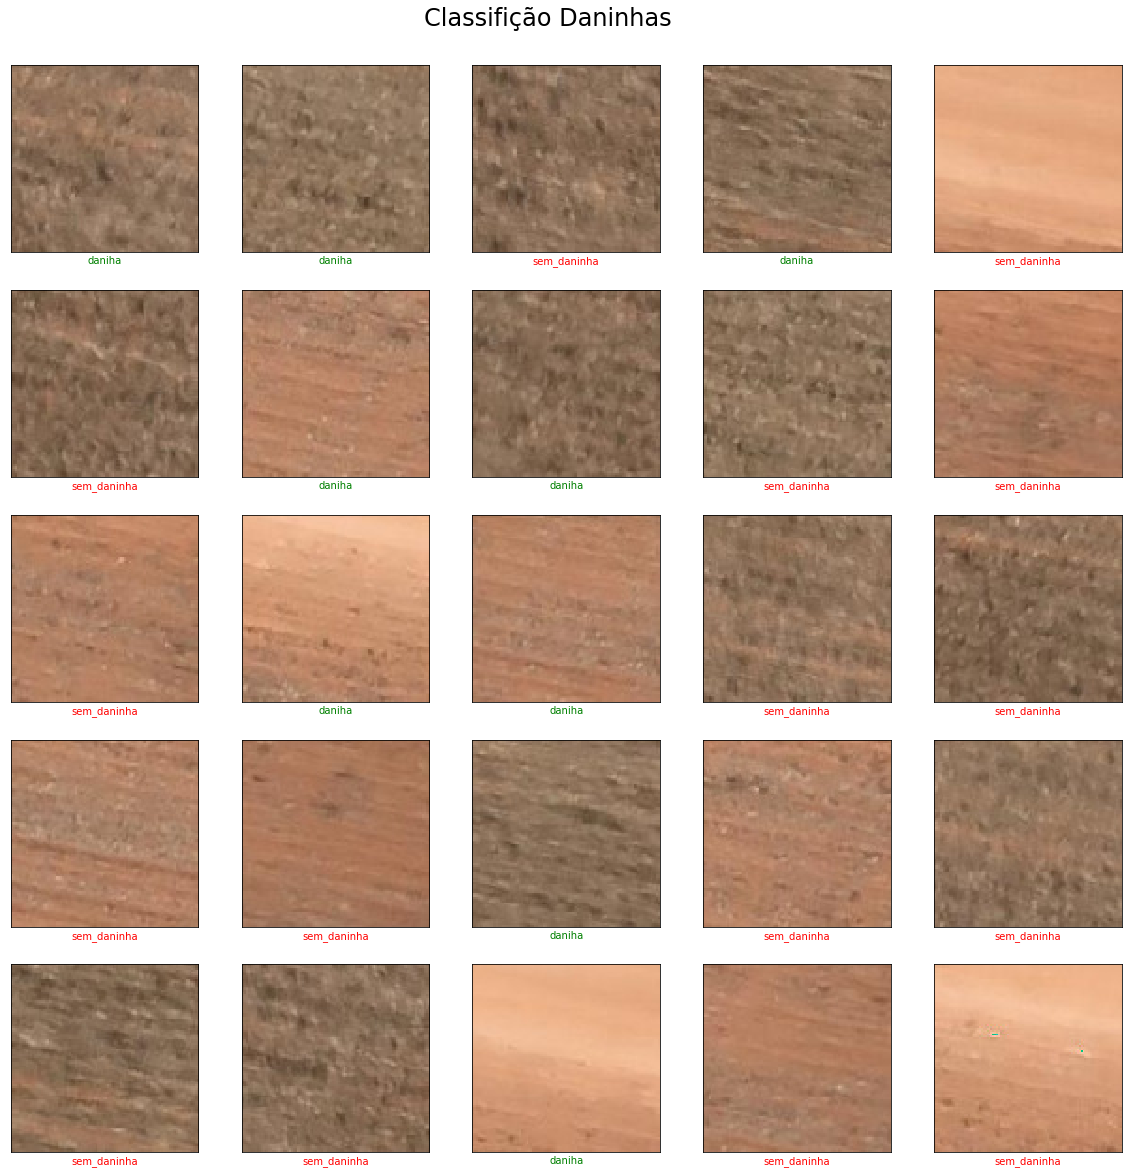

In [229]:
images_data = []
filenames = []
count_daninha = 0
count_sem_daninha = 0
count = 0
pred_result = model.predict(validation_generator, len(images) // batch_size+1)
#print(pred_result)
plt.figure(figsize=(20,20))
grid_size = min(0, len(pred_result))

for filename in os.listdir(image_path):
    images_data.append(pred_result)
    filenames.append(filename)
    plt.subplot(5, 5, count+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[count].astype(np.int32), cmap=plt.cm.binary)
    if pred_result[count][0]> pred_result[count][1]:
        legend_x = plt.xlabel("daniha")
        legend_x.set_color("green")
        count_daninha = count_daninha + 1
        if count >= num_of_test_samples -1:
            break
    else :
        legend_x = plt.xlabel("sem_daninha")
        legend_x.set_color("red")
        count_sem_daninha = count_sem_daninha + 1
    count += 1

print("count_daninha", count_daninha)
print("count_sem_daninha", count_sem_daninha)
plt.suptitle('Classifição Daninhas', y = 0.92, fontsize=24)
plt.show(images_data)